In [171]:
import os
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [2]:
os.chdir(r"..\\Data")
directory=os.curdir
files=os.listdir(directory)
files=[directory+ '\\' +file for file in files]
data=[]
for file in files:
    print(file)
    content=pd.read_excel(file)
    data.append(content)
merged_data=pd.concat(data)



.\2010_Accidentalidad.xlsx
.\2011_Accidentalidad.xlsx
.\2012_Accidentalidad.xlsx
.\2013_Accidentalidad.xlsx
.\2014_Accidentalidad.xlsx
.\2015_Accidentalidad - copia.xlsx
.\2016_Accidentalidad.xlsx
.\2017_Accidentalidad.xlsx
.\2018_Accidentalidad.xlsx


In [164]:
#Trasnformaciones
df_obj = merged_data.select_dtypes(['object'])
merged_data.LESIVIDAD=merged_data.LESIVIDAD.apply(lambda x:x[:2]);

In [5]:
merged_data.dtypes

FECHA                 datetime64[ns]
RANGO HORARIO                 object
DIA SEMANA                    object
DISTRITO                      object
LUGAR ACCIDENTE               object
Nº                            object
Nº PARTE                      object
CPFA Granizo                  object
CPFA Hielo                    object
CPFA Lluvia                   object
CPFA Niebla                   object
CPFA Seco                     object
CPFA Nieve                    object
CPSV Mojada                   object
CPSV Aceite                   object
CPSV Barro                    object
CPSV Grava Suelta             object
CPSV Hielo                    object
CPSV Seca Y Limpia            object
VICTIMAS                       int64
TIPO ACCIDENTE                object
Tipo Vehiculo                 object
TIPO PERSONA                  object
SEXO                          object
LESIVIDAD                     object
Tramo Edad                    object
dtype: object

In [17]:
merged_data['ANO']=merged_data.FECHA.apply(lambda x:x.year)

# Primer objetivo específico
* Reducir el número de peatones atropellados en un 25% respecto a la media de 2003-2006.

<BarContainer object of 9 artists>

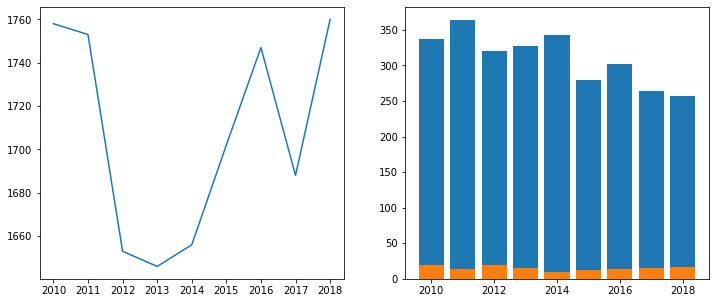

In [214]:

filtered_data=merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO')) & (merged_data['LESIVIDAD'].isin(['HG','MT','HL']))]
filtered_data=filtered_data.drop_duplicates(subset='Nº PARTE',keep='first')

plt.figure(figsize=(12,5))
plt.subplot(121)
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',aggfunc='sum');
plt.plot(pt)
pt=pd.pivot_table(data=filtered_data,index='ANO',values='VICTIMAS',columns='LESIVIDAD',aggfunc='count')
ax=plt.subplot(122)

ax.bar(height=pt.HG,x=pt.index,align='center')
ax.bar(height=pt.MT,x=pt.index,align='center')



Según el plan de seguridad vial 2010-2019 este valor se debería reducir hasta 1325 atropellos anuales sin embargo no se ha llegado a alcanzar este valor, repuntando el número de atropellos desde el año 2013 hasta la actualidad.

# Segundo objetivo específico

Reducir en un 25% el número de heridos graves en accidentes de circulación respecto a la mediade 2003-2006. En cifras, suponía reducir los 1.000 heridos graves registrados de media en el periodo2003-2006 a no más de 750.

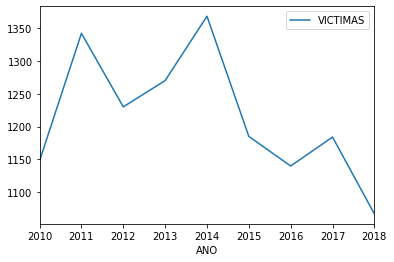

In [229]:
heridos_graves=merged_data[(merged_data['LESIVIDAD'].isin(['HG']))]
heridos_graves=heridos_graves.drop_duplicates(subset='Nº PARTE',keep='first')
heridos_graves.groupby(by='ANO')[['VICTIMAS']].sum().plot();


In [ ]:
#merged_data[merged_data.LESIVIDAD=='MT'].groupby(by=['ANO','LESIVIDAD'])['VICTIMAS'].sum().plot(kind='bar')
#merged_data[(merged_data['LESIVIDAD'].str.match('MT'))&(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO'))].groupby(by=['ANO'])['VICTIMAS'].sum().plot(kind='bar')
#merged_data[(merged_data['LESIVIDAD'].str.match('MT'))].groupby(by=['ANO'])['VICTIMAS'].sum()
merged_data[(merged_data['TIPO ACCIDENTE'].str.match('ATROPELLO'))].groupby(by=['ANO','LESIVIDAD'])['VICTIMAS'].sum()
#merged_data.LESIVIDAD=merged_data.LESIVIDAD.apply(lambda x:x[:2])

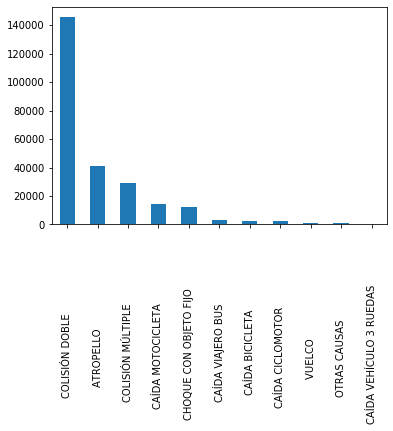

In [66]:
merged_data.LESIVIDAD.value_counts()
merged_data['TIPO ACCIDENTE'].value_counts().plot(kind='bar')